# NumPy: Numerical Arrays for Python

**Learning Objectives:** Learn how to create, transform and visualize multidimensional data of a single type using NumPy. 

NumPy is the foundation for scientific computing and data science in Python. Its core data structure is a multidimensional array with the following characteristics:

* Any number of dimensions
* All elements of an array have the same data type
* Array elements are usually native data dtype
* The memory for an array is a contiguous block that can be easily passed to other numerical libraries (BLAS, LAPACK, etc.).
* Most of NumPy is implemented in C, so it is fast.

## Plotting

While this notebook doesn't focus on plotting, Matplotlib will be used to make a few basic plots.

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

style.use(['seaborn-darkgrid', 'seaborn-notebook'])

The `vizarray` package will be used to visualize NumPy arrays:

In [42]:
import vizarray as va

## Multidimensional array type

This is the canonical way you should import Numpy:

In [43]:
import numpy as np

NumPy arrays can be contructed from iterables:

In [6]:
data = [0,2,4,6]
a = np.array(data)

In [8]:
type(a)

numpy.ndarray

In [9]:
a

array([0, 2, 4, 6])

The `vz.vizarray` function can be used to visualize a 1d or 2d NumPy array using a colormap:

In [10]:
va.vizarray(a)

,,,


The shape of the array:

In [11]:
a.shape

(4,)

The number of array dimensions:

In [12]:
a.ndim

1

The number of array elements:

In [13]:
a.size

4

The number of bytes the array takes up:

In [14]:
a.nbytes

32

The `dtype` attribute describes the "data type" of the elements:

In [15]:
a.dtype

dtype('int64')

## Creating arrays

Multidimensional arrays can be created with nested lists or tuples:

In [18]:
data = [[0.0,2.0,4.0,6.0],[1.0,3.0,5.0,7.0]]
b = np.array(data)

In [19]:
b

array([[ 0.,  2.,  4.,  6.],
       [ 1.,  3.,  5.,  7.]])

In [20]:
va.vizarray(b)

,,,
,,,


In [21]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

The `arange` function is similar to Python's builtin `range` function, but creates an array:

In [22]:
c = np.arange(0.0, 10.0, 1.0) # Step size of 1.0
c

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

The `linspace` function is similar, but allows you to specify the number of points:

In [23]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

There are also `empty`, `zeros` and `ones` functions:

In [24]:
np.empty((4,4))

array([[  6.92938072e-310,   1.27851620e-316,   0.00000000e+000,
          6.92935426e-310],
       [  0.00000000e+000,   0.00000000e+000,   5.14275698e-317,
          0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   6.92935426e-310,
          0.00000000e+000],
       [  6.92937923e-310,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000]])

In [22]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

See also:

* `empty_like`, `ones_like`, `zeros_like`
* `eye`, `identity`, `diag`

## dtype

Arrays have a `dtype` attribute that encapsulates the "data type" of each element. It can be set:

* Implicitely by the element type
* By passing the `dtype` argument to an array creation function

Here is an integer valued array:

In [25]:
a = np.array([0,1,2,3])

In [26]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

All array creation functions accept an optional `dtype` argument:

In [27]:
b = np.zeros((2,2), dtype=np.complex64)
b

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]], dtype=complex64)

In [28]:
c = np.arange(0, 10, 2, dtype=np.float)
c

array([ 0.,  2.,  4.,  6.,  8.])

You can use the `astype` method to create a copy of the array with a given `dtype`:

In [29]:
d = c.astype(dtype=np.int)
d

array([0, 2, 4, 6, 8])

IPython's tab completion is useful for exploring the various available `dtypes`:

In [30]:
np.float*?

np.float
np.float128
np.float16
np.float32
np.float64
np.float_
np.floating

The NumPy documentation on [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) describes the many other ways of specifying dtypes.

## Array operations

Basic mathematical operations are **elementwise** for:

* Scalars and arrays
* Arrays and arrays

Fill an array with a value:

In [31]:
a = np.empty((3,3))
a.fill(0.1)
a

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

In [32]:
b = np.ones((3,3))
b

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Addition is elementwise:

In [33]:
a+b

array([[ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1]])

Division is elementwise:

In [34]:
b/a

array([[ 10.,  10.,  10.],
       [ 10.,  10.,  10.],
       [ 10.,  10.,  10.]])

As are powers:

In [35]:
a**2

array([[ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01]])

Scalar multiplication is also elementwise:

In [36]:
np.pi*b

array([[ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265]])

## Indexing and slicing

Indexing and slicing provide an efficient way of getting the values in an array and modifying them.

In [26]:
a = np.random.rand(10,10)

The `enable` function is part of `vizarray` and enables a nice display of arrays:

In [27]:
va.enable_notebook()

In [28]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


List Python lists and tuples, NumPy arrays have zero-based indexing and use the `[]` syntax for getting and setting values:

In [29]:
a[0,0]

0.16339680614501007

An index of `-1` refers to the last element along that axis:

In [30]:
a[-1,-1] == a[9,9]

True

Extract the 0th column using the `:` syntax, which denotes all elements along that axis.

In [31]:
a[:,0]

,,,,,,,,,


The last row:

In [32]:
a[-1,:]

,,,,,,,,,


You can also slice ranges:

In [33]:
a[0:2,0:2]

,
,


Assignment also works with slices:

In [34]:
a[0:5,0:5] = 1.0

In [35]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Note how even though we assigned the value to the slice, the original array was changed. This clarifies that slices are **views** of the same data, not a copy.

In [36]:
va.disable_notebook()

### Boolean indexing

Arrays can be indexed using other arrays that have boolean values.

In [37]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Boolean expressions involving arrays create new arrays with a `bool` dtype and the elementwise result of the expression:

In [38]:
ages > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [39]:
genders == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Boolean expressions provide an extremely fast and flexible way of querying arrays:

In [40]:
(ages > 10) & (ages < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

You can use a boolean array to index into the original or another array. This selects the ages of all females in the `genders` array:

In [41]:
mask = (genders == 'f')
ages[mask]

array([67, 89, 56, 72])

In [42]:
ages[ages>30]

array([56, 67, 89, 56, 72])

## Reshaping, transposing

In [38]:
va.enable_notebook()

In [39]:
a = np.random.rand(3,4)

In [40]:
a

,,,
,,,
,,,


The `T` atrribute contains the transpose of the original array:

In [37]:
a.T

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

The `reshape` method can be used to change the shape and even the number of dimensions:

In [46]:
a.reshape(2,6)

,,,,,
,,,,,


In [47]:
a.reshape(6,2)

,
,
,
,
,
,


The `ravel` method strings the array out in one dimension:

In [48]:
a.ravel()

,,,,,,,,,,,


In [44]:
va.disable_notebook()

## Universal functions

Universal function, or "ufuncs," are functions that take and return arrays or scalars. They have the following characteristics:

* Vectorized C implementations, much faster than hand written loops in Python
* Allow for concise Pythonic code
* Here is a complete list of the [available NumPy ufuncs](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) lists the available ufuncs.

In [45]:
va.set_block_size(5)
va.enable_notebook()

Here is a linear sequence of values"

In [46]:
t = np.linspace(0.0, 4*np.pi, 100)
t

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Take the $sin$ of each element of the array:

In [55]:
np.sin(t)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


As the next two examples show, multiple ufuncs can be used to create complex mathematical expressions that can be computed efficiently:

In [47]:
np.exp(np.sqrt(t))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [42]:
va.disable_notebook()
va.set_block_size(30)

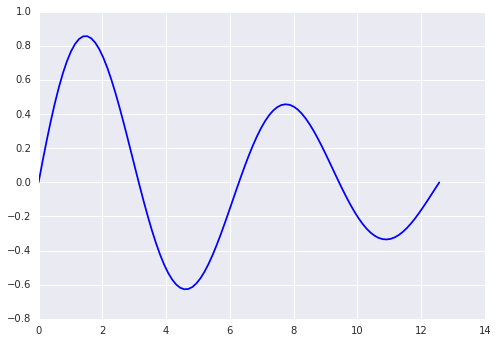

In [48]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t));

In general, you should always try to use ufuncs rather than do computations using for loops. These types of array based computations are referred to as *vectorized*.

## Basic data processing

In [7]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Numpy has a basic set of methods and function for computing basic quantities about data.

In [56]:
ages.min(), ages.max()

(8, 89)

Compute the mean:

In [8]:
ages.mean()

43.299999999999997

Compute the variance and standard deviation:

In [9]:
ages.var(), ages.std()

(711.21000000000004, 26.668520768876554)

The `bincount` function counts how many times each value occurs in the array:

In [10]:
np.bincount(ages)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

The `cumsum` and `cumprod` methods compute cumulative sums and products:

In [11]:
ages.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [12]:
ages.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

Most of the functions and methods above take an `axis` argument that will apply the action along a particular axis:

In [5]:
a = np.random.randint(0,10,(3,4))
a

array([[1, 3, 6, 2],
       [2, 0, 9, 0],
       [1, 0, 3, 8]])

With `axis=0` the action takes place along rows:

In [13]:
a.sum(axis=0)

array([ 4,  3, 18, 10])

With `axis=1` the action takes place along columns:

In [14]:
a.sum(axis=1)

array([12, 11, 12])

The `unique` function is extremely useful in working with categorical data:

In [15]:
np.unique(genders)

array(['f', 'm'], 
      dtype='<U1')

In [16]:
np.unique(genders, return_counts=True)

(array(['f', 'm'], 
       dtype='<U1'), array([4, 6]))

The where function allows you to apply conditional logic to arrays. Here is a rough sketch of how it works:

```python
def where(condition, if_false, if_true):
```

In [17]:
np.where(ages>30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

The `if_false` and `if_true` values can be arrays themselves:

In [18]:
np.where(ages<30, 0, ages)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## File IO

NumPy has a a number of different function to reading and writing arrays to and from disk.

### Single array, binary format

In [19]:
a = np.random.rand(10)
a

array([  4.94791323e-01,   2.44459747e-01,   2.58237267e-01,
         5.96108850e-01,   6.90519179e-01,   6.41362886e-01,
         9.61072011e-01,   3.60082218e-01,   9.61265695e-01,
         2.99462754e-04])

Save the array to a binary file named `array1.npy`:

In [38]:
np.save('array1', a)

In [39]:
ls

array1.npy  Day04.ipynb  Numpy.ipynb


Using `%pycat` to look at the file shows that it is binary:

In [40]:
!cat array1.npy

�NUMPY F {'descr': '<f8', 'fortran_order': False, 'shape': (5, 5), }          
(�ǣ�?�ɠ���?Ȭ6��k�?��\��?��Ra�?ߟr��?裠T���?JȆH��?��S�K�?HHE���?�fǗ"�?������?d�oH��?���~`"�?0��z�!�?X��D.�?���!�?�*��?0�e�1d�?r�*�?�1���?c>����? ��2/�?

Load the array back into memory:

In [ ]:
a_copy = np.load('array1.npy')

In [ ]:
a_copy

### Single array, text format

In [37]:
b = np.random.randint(0,10,(5,3))
b

array([[7, 5, 6],
       [1, 9, 3],
       [1, 2, 5],
       [1, 1, 3],
       [0, 5, 7]])

The `savetxt` function saves arrays in a simple, textual format that is less effecient, but easier for other languges to read:

In [ ]:
np.savetxt('array2.txt', b)

In [ ]:
ls

Using `%pycat` to look at the contents shows that the files is indeed a plain text file:

In [ ]:
!cat array2.txt

In [ ]:
np.loadtxt('array2.txt')

### Multiple arrays, binary format

The `savez` function provides an efficient way of saving multiple arrays to a single file:

In [ ]:
np.savez('arrays.npz', a=a, b=b)

The `load` function returns a dictionary like object that provides access to the individual arrays:

In [ ]:
a_and_b = np.load('arrays.npz')

In [ ]:
a_and_b['a']

In [ ]:
a_and_b['b']

## Linear algebra

NumPy has excellent linear algebra capabilities.

In [36]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Remember that array operations are elementwise. Thus, this is **not** matrix multiplication:

In [22]:
a*b

array([[ 0.76186973,  0.00972327,  0.11918822,  0.50756575,  0.30941418],
       [ 0.01498377,  0.50323206,  0.03121369,  0.15499799,  0.11590769],
       [ 0.65961963,  0.22737003,  0.032414  ,  0.63711955,  0.60337566],
       [ 0.12208322,  0.10017516,  0.39886466,  0.26664827,  0.7372906 ],
       [ 0.07156264,  0.10175872,  0.31654127,  0.13695329,  0.29798795]])

To get matrix multiplication use `np.dot`:

In [23]:
np.dot(a, b)

array([[ 1.32901181,  0.59619607,  1.43335867,  1.98978489,  1.66089261],
       [ 1.42560244,  1.05979481,  0.48768037,  1.63158379,  1.92074188],
       [ 2.18632697,  1.25869973,  1.53622783,  2.93128159,  2.86697211],
       [ 1.89361676,  0.7091051 ,  1.36642253,  2.45504429,  2.15710064],
       [ 1.3451892 ,  0.73363565,  0.40679742,  1.47180737,  1.57450973]])

Or, NumPy as a `matrix` subclass for which matrix operations are the default:

In [24]:
m1 = np.matrix(a)
m2 = np.matrix(b)

In [25]:
m1*m2

matrix([[ 1.32901181,  0.59619607,  1.43335867,  1.98978489,  1.66089261],
        [ 1.42560244,  1.05979481,  0.48768037,  1.63158379,  1.92074188],
        [ 2.18632697,  1.25869973,  1.53622783,  2.93128159,  2.86697211],
        [ 1.89361676,  0.7091051 ,  1.36642253,  2.45504429,  2.15710064],
        [ 1.3451892 ,  0.73363565,  0.40679742,  1.47180737,  1.57450973]])

The `np.linalg` package has a wide range of fast linear algebra operations.

Here is determinant:

In [26]:
np.linalg.det(a)

0.01486673961242773

Matrix inverse:

In [27]:
np.linalg.inv(a)

array([[ 1.43985574,  4.13676648, -4.26031595,  3.23874872, -2.85624615],
       [-2.38223638,  8.07708483, -3.57714493,  6.31098768, -8.89615136],
       [ 1.88262827, -3.42186421,  0.57418113, -3.12304059,  5.89531107],
       [ 1.22118567, -6.02349862,  5.25974463, -6.00687118,  5.18315695],
       [-2.17233899, -1.90007133,  2.78842626,  0.12964149, -0.12048277]])

Eigenvalues:

In [28]:
np.linalg.eigvals(a)

array([ 2.69789133+0.j        ,  0.77636684+0.j        ,
       -0.17543685+0.16725019j, -0.17543685-0.16725019j,  0.12081230+0.j        ])

NumPy can be built against fast BLAS/LAPACK implementation for these linear algebra operations.

In [44]:
c = np.random.rand(2000,2000)


In [30]:
%timeit -n1 -r1 evs = np.linalg.eigvals(c)

1 loops, best of 1: 17.3 s per loop


In [31]:
p = np.random.rand(10, 10)
p

array([[ 0.53654297,  0.5964229 ,  0.89370203,  0.77621486,  0.84972519,
         0.7183751 ,  0.10598307,  0.83032597,  0.77770943,  0.11940096],
       [ 0.55702064,  0.44246903,  0.35427215,  0.75312079,  0.19221211,
         0.6723534 ,  0.05315195,  0.12550619,  0.99856948,  0.96883721],
       [ 0.58164185,  0.38977344,  0.9916722 ,  0.52632226,  0.31678092,
         0.96535684,  0.54735302,  0.12365465,  0.55578989,  0.61860517],
       [ 0.554872  ,  0.3102234 ,  0.60080265,  0.77268184,  0.66305247,
         0.62698884,  0.49465543,  0.11103399,  0.74689475,  0.7806865 ],
       [ 0.04691227,  0.50664592,  0.81931573,  0.32640005,  0.39503052,
         0.70052288,  0.69787753,  0.85125582,  0.40949267,  0.39943061],
       [ 0.41996487,  0.49192448,  0.33048459,  0.52765747,  0.56701115,
         0.13369156,  0.44136484,  0.51751285,  0.46755833,  0.18934219],
       [ 0.56639633,  0.45455228,  0.51830808,  0.02904218,  0.928534  ,
         0.75623519,  0.80043001,  0.6043781 

## Random numbers

NumPy has functions for creating arrays of random numbers from different distributions in `np.random`, as well as handling things like permutation, shuffling, and choosing.

Here is the [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

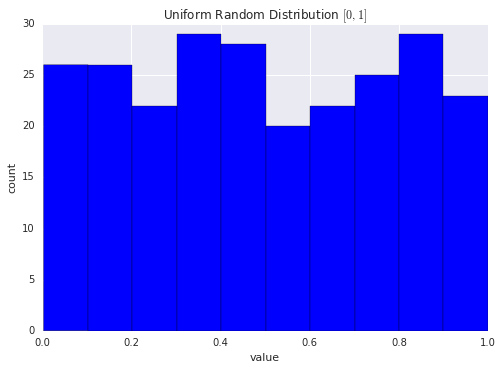

In [32]:
plt.hist(np.random.random(250))
plt.title('Uniform Random Distribution $[0,1]$')
plt.xlabel('value')
plt.ylabel('count')

The `shuffle` function shuffles an array in place:

In [33]:
a = np.arange(0,10)
np.random.shuffle(a)
a

array([5, 1, 4, 9, 2, 7, 8, 6, 0, 3])

The `permutation` function does the same thing but first makes a copy:

In [34]:
a = np.arange(0,10)
print(np.random.permutation(a))
print(a)

[9 1 5 0 2 7 6 8 4 3]
[0 1 2 3 4 5 6 7 8 9]


The `choice` function provides a powerful way of creating synthetic data sets of discrete data:

In [35]:
np.random.choice(['m','f'], 20, p=[0.25,0.75])

array(['m', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'f', 'f', 'm', 'f', 'm',
       'f', 'f', 'm', 'f', 'f', 'm', 'f'], 
      dtype='<U1')

## Resources

* [NumPy Reference Documentation](http://docs.scipy.org/doc/numpy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.